In [4]:
import pandas as pd
file_path = 'wandb_export.csv'
data = pd.read_csv(file_path)
data.head()

,Step,oxford_flowers102-colu-conv2d - train/loss,oxford_flowers102-colu-conv2d - train/loss__MIN,oxford_flowers102-colu-conv2d - train/loss__MAX,oxford_flowers102-relu-conv2d - train/loss,oxford_flowers102-relu-conv2d - train/loss__MIN,oxford_flowers102-relu-conv2d - train/loss__MAX
0,0,0.184845,0.184845,0.184845,0.255403,0.255403,0.255403
1,1,0.089932,0.089932,0.089932,0.102125,0.102125,0.102125
2,2,0.076057,0.076057,0.076057,0.082526,0.082526,0.082526
3,3,0.072049,0.072049,0.072049,0.077538,0.077538,0.077538
4,4,0.065537,0.065537,0.065537,0.070953,0.070953,0.070953


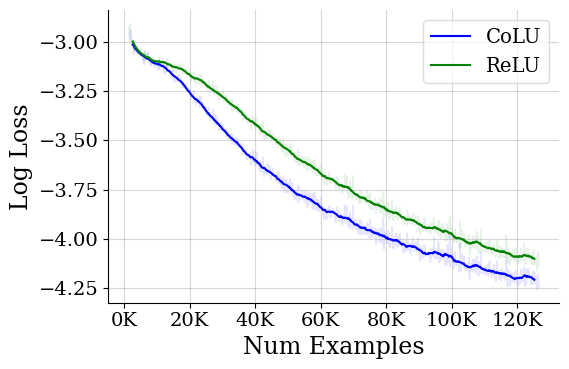

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

def pretty_plt():
    plt.rcParams.update({
        "text.usetex": False,
        "font.family": "serif",
        "font.sans-serif": ["Computer Modern Roman"]})
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.bottom'] = True
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.5
    plt.rcParams['font.size'] = 17
    plt.rcParams['legend.framealpha'] = 0.7
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    # plt.rcParams['xaxis.labellocation'] = 'center'
    # plt.rcParams['yaxis.labellocation'] = 'top'
    plt.rcParams['legend.fontsize'] = 'small'

pretty_plt()

def ma(data, window_size=20):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


# Extract relevant data
idx = range(10,900)
steps = (data['Step'] * 128)[idx]
colu_loss = (np.log(data['oxford_flowers102-colu-conv2d - train/loss'])[idx])
colu_loss_min = (np.log(data['oxford_flowers102-colu-conv2d - train/loss__MIN'])[idx])
colu_loss_max = (np.log(data['oxford_flowers102-colu-conv2d - train/loss__MAX'])[idx])

relu_loss = (np.log(data['oxford_flowers102-relu-conv2d - train/loss'])[idx])
relu_loss_min = (np.log(data['oxford_flowers102-relu-conv2d - train/loss__MIN'])[idx])
relu_loss_max = (np.log(data['oxford_flowers102-relu-conv2d - train/loss__MAX'])[idx])

# Plotting the curves
plt.figure(figsize=(6,4))

plt.plot(ma(steps), ma(colu_loss), label='CoLU', color='blue')
plt.plot(ma(steps), ma(relu_loss), label='ReLU', color='green')

plt.fill_between(steps, colu_loss_min, colu_loss_max, color='blue', alpha=0.1)
plt.fill_between(steps, relu_loss_min, relu_loss_max, color='green', alpha=0.1)

# Adding labels and title
plt.xlabel('Num Examples')
plt.ylabel('Log Loss')
# plt.title('Log Loss over Training Examples')
plt.legend()
plt.grid(True)
plt.tight_layout()
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))


# Display the plot
# plt.show()
plt.savefig('ddpm_learn.pdf')
